<a href="https://colab.research.google.com/github/bichdnle/PythonProjects/blob/main/RFM%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DataFrame**

**Load the dataset**

In [ ]:
import pandas as pd

ecommerce_retail = pd.read_excel("ecommerce retail.xlsx")
seg = pd.read_excel("ecommerce retail.xlsx", sheet_name="Segmentation")

In [ ]:
ecommerce_retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


# **EDA**

**Check missing values, incorrect data types, duplicates, outliers**

In [ ]:
ecommerce_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
# Convert data types
ecommerce_retail['CustomerID'] = pd.to_numeric(ecommerce_retail['CustomerID'], errors='coerce').fillna(0).astype('int64')
ecommerce_retail['InvoiceDate'] = pd.to_datetime(ecommerce_retail['InvoiceDate'])
ecommerce_retail[['InvoiceNo', 'StockCode', 'Description', 'Country']] = ecommerce_retail[['InvoiceNo', 'StockCode', 'Description', 'Country']].astype(str)
ecommerce_retail.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int64
Country                object
dtype: object

In [ ]:
ecommerce_retail.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,541909.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,11476.974671
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,0.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,12352.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,14382.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16255.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,6777.908326


In [ ]:
ecommerce_retail.isnull().sum()
ecommerce_retail.dropna(subset=['CustomerID'], inplace=True)

In [ ]:
ecommerce_retail.nunique()
ecommerce_retail.duplicated()
ecommerce_retail.drop_duplicates(inplace=True)

In [ ]:
ecommerce_retail[(ecommerce_retail['Quantity'] > 0) & (ecommerce_retail['UnitPrice'] > 0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


**Explore relationships across numerical, categorical, and DateTime data**

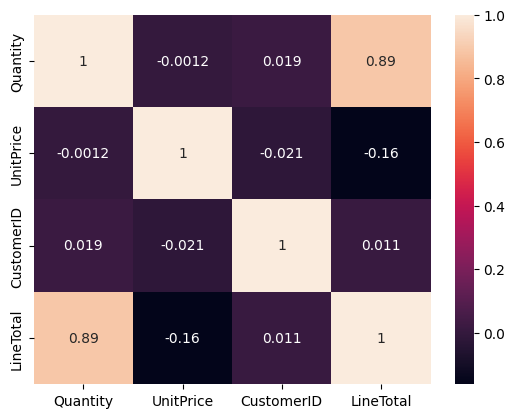

In [ ]:
import seaborn as sns

numeric_columns = ecommerce_retail.select_dtypes(include=['number'])
dataplot = sns.heatmap(numeric_columns.corr(), annot=True)

# **Data Wrangling**

**Calculate Recency**

In [ ]:
# Calculate the present date
present_day = pd.Timestamp('12/31/2011')
# Calculate recent purchase
recency = ecommerce_retail.groupby('CustomerID')['InvoiceDate'].apply(lambda x: (present_day - x.max()).days).reset_index()
recency.columns = ['CustomerID', 'Recency']
recency.columns

Index(['CustomerID', 'Recency'], dtype='object')

**Calculate Frequency**

In [ ]:
frequency = ecommerce_retail.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
frequency.columns = ['CustomerID', 'Frequency']
frequency.columns

Index(['CustomerID', 'Frequency'], dtype='object')

**Calculate Monetary**

In [ ]:
ecommerce_retail['LineTotal'] = ecommerce_retail['Quantity'] * ecommerce_retail['UnitPrice']
monetary = ecommerce_retail.groupby('CustomerID')['LineTotal'].sum().reset_index()
monetary.columns = ['CustomerID', 'Monetary']
monetary.columns

Index(['CustomerID', 'Monetary'], dtype='object')

**Create RFM DataFrame**

In [ ]:
rfm = pd.merge(recency, frequency, on='CustomerID', how='left')
rfm = pd.merge(rfm, monetary, on='CustomerID', how='left')
rfm

,CustomerID,Recency,Frequency,Monetary
0,0,21,3710,1447487.53
1,12346,346,2,0.00
2,12347,23,7,4310.00
3,12348,96,4,1797.24
4,12349,39,1,1757.55
...,...,...,...,...
4368,18280,298,1,180.60
4369,18281,201,1,80.82
4370,18282,28,3,176.60
4371,18283,24,16,2045.53


**Calculate RFM**

In [ ]:
# Calculate RFM score
rfm['R_score'] = pd.qcut(rfm['Recency'], 5, labels=False)
rfm['F_score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=False)
rfm['M_score'] = pd.qcut(rfm['Monetary'], 5, labels=False)
rfm['RFM_score'] = rfm['R_score'] * 100 + rfm['F_score'] *10 + rfm['M_score']

**Segmentation**

In [ ]:
# Define segmentation
seg['RFM_score'] = seg['RFM Score'].str.split(',')
seg = seg.explode('RFM_score').reset_index(drop=True)
seg['RFM_score'] = seg['RFM_score'].astype(int)

# Create segmentation dataframe
segmentation = pd.merge(rfm, seg, on='RFM_score', how='left')
segmentation['LineTotal'] = ecommerce_retail['LineTotal']
segmentation.insert(loc=1, column='LineTotal', value=segmentation.pop('LineTotal'))
segmentation.drop(columns=['RFM Score'], inplace=True)
segmentation

,CustomerID,LineTotal,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score,Segment
0,0,15.30,21,3710,1447487.53,0,4,4,44,NaN
1,12346,20.34,346,2,0.00,4,1,0,410,NaN
2,12347,22.00,23,7,4310.00,0,3,4,34,NaN
3,12348,20.34,96,4,1797.24,3,2,3,323,Potential Loyalist
4,12349,20.34,39,1,1757.55,1,0,3,103,NaN
...,...,...,...,...,...,...,...,...,...,...
4368,18280,16.50,298,1,180.60,4,1,0,410,NaN
4369,18281,15.00,201,1,80.82,4,1,0,410,NaN
4370,18282,15.00,28,3,176.60,0,2,0,20,NaN
4371,18283,19.80,24,16,2045.53,0,4,4,44,NaN


In [ ]:
segmentation.isna().sum()
segmentation.dropna(subset=['Segment'], inplace=True)
segmentation

,CustomerID,LineTotal,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score,Segment
3,12348,20.34,96,4,1797.24,3,2,3,323,Potential Loyalist
6,12352,25.50,57,11,1545.41,2,4,3,243,At Risk
10,12356,12.60,43,3,2811.43,1,2,4,124,At Risk
14,12360,25.50,73,3,2662.06,2,2,4,224,At Risk
17,12363,17.85,130,2,552.00,3,1,2,312,About To Sleep
...,...,...,...,...,...,...,...,...,...,...
4357,18263,17.70,44,4,1211.08,1,3,3,133,At Risk
4358,18265,53.10,93,2,801.51,3,2,2,322,Hibernating customers
4361,18270,53.10,59,3,238.95,2,2,1,221,About To Sleep
4365,18276,16.50,42,3,323.36,1,2,1,121,Lost customers


# **Visualization**

**The distribution of Recency, Frequency, Monetary**

<ipython-input-19-360ad6987209>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm[col])


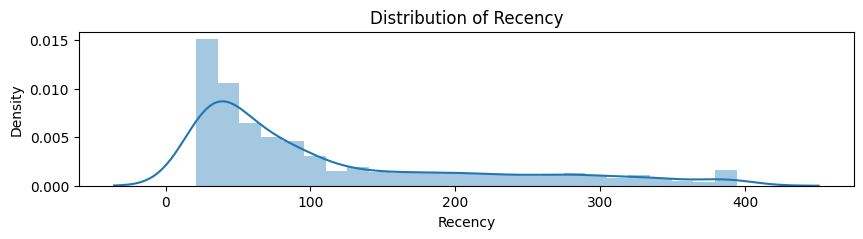

<ipython-input-19-360ad6987209>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm[col])


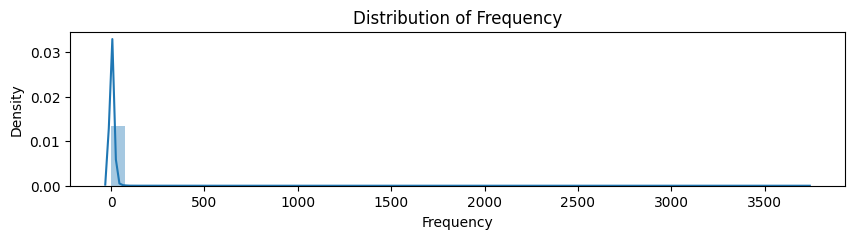

<ipython-input-19-360ad6987209>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm[col])


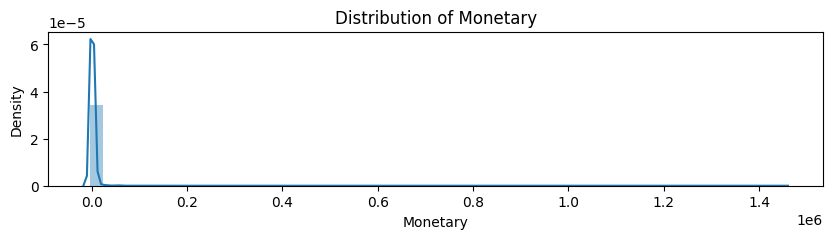

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

colnames = ['Recency', 'Frequency', 'Monetary']
for col in colnames:
    fig, ax = plt.subplots(figsize=(10, 2))
    sns.distplot(rfm[col])
    ax.set_title('Distribution of %s' % col)
    plt.show()

**RFM Segmentation**

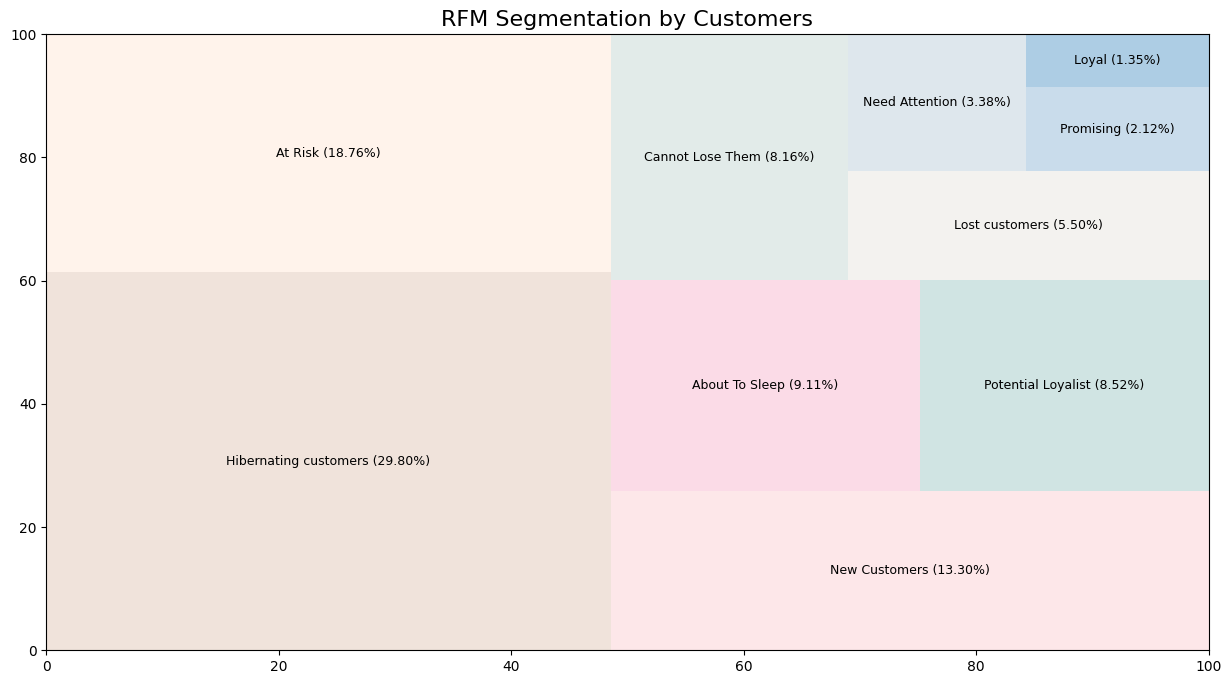

In [ ]:
# Segment by customers
import matplotlib.pyplot as plt
!pip install squarify
import squarify

colors = ['#EDDCD2', '#FFF1E6', '#FDE2E4', '#FAD2E1', '#C5DEDD', '#DBE7E4', '#F0EFEB', '#D6E2E9', '#BCD4E6', '#99C1DE']
segment_counts = segmentation['Segment'].value_counts()
total = segment_counts.sum()

fig, ax = plt.subplots(1, figsize=(15,8))

squarify.plot(sizes=segment_counts,
              label=[f"{label} ({count / total * 100:.2f}%)" for label, count in segment_counts.items()],
              alpha=0.8,
              color=colors,
              text_kwargs={'fontsize': 9})
plt.title('RFM Segmentation by Customers', fontsize=16)
plt.show()

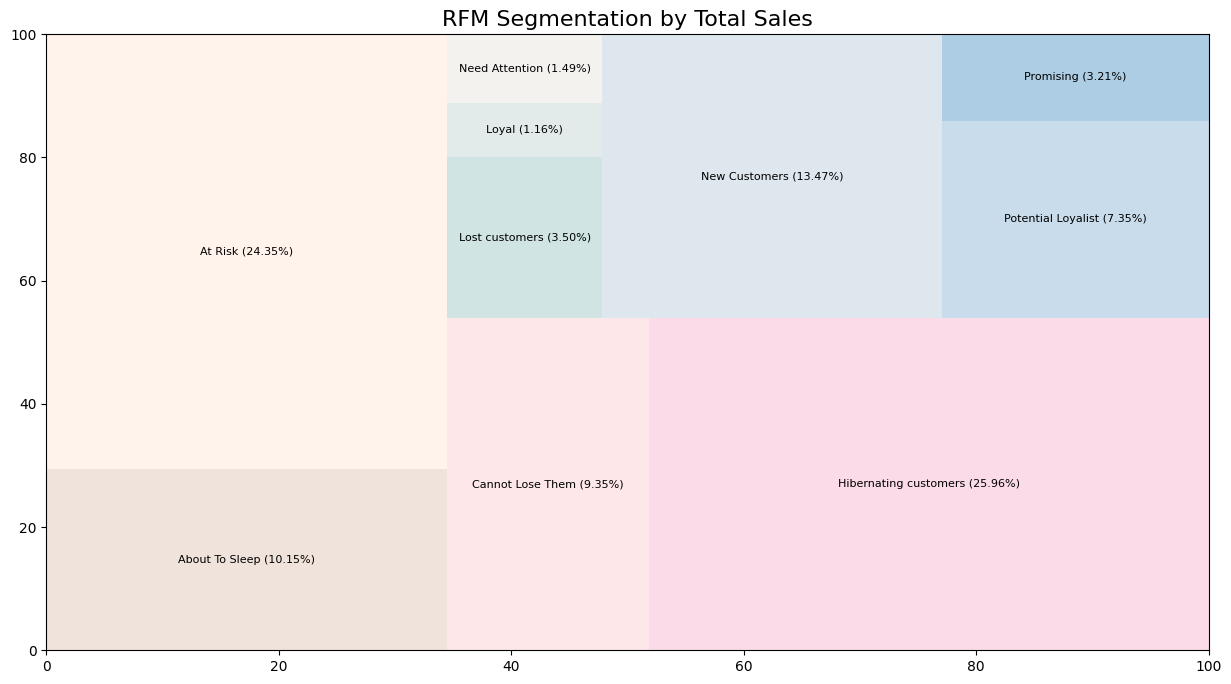

In [ ]:
# Segment by customers
import matplotlib.pyplot as plt
import squarify

colors = ['#EDDCD2', '#FFF1E6', '#FDE2E4', '#FAD2E1', '#C5DEDD', '#DBE7E4', '#F0EFEB', '#D6E2E9', '#BCD4E6', '#99C1DE']
sales_by_segment = segmentation.groupby('Segment')['LineTotal'].sum()
sales_by_segment = sales_by_segment[sales_by_segment > 0]
total_sales = sales_by_segment.sum()
fig, ax = plt.subplots(1, figsize=(15,8))

squarify.plot(sizes=sales_by_segment,
              label=[f"{label} ({sales / total_sales * 100:.2f}%)" for label, sales in sales_by_segment.items()],
              alpha=0.8,
              color=colors,
              text_kwargs={'fontsize': 8})
plt.title('RFM Segmentation by Total Sales', fontsize=16)
plt.show()